In [ ]:
# Імпорт необхідних бібліотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2, l1_l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Завантаження та попередня обробка даних California Housing
from sklearn.datasets import fetch_california_housing

# Завантаження датасету
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Розділення на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабування ознак
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Інформація про датасет
print(f"Розмірність даних: {X.shape}")
print(f"Кількість ознак: {X.shape[1]}")
print(f"Цільова змінна (медіанна вартість будинку):")
print(f"  Середнє: {np.mean(y):.2f}")
print(f"  Мінімум: {np.min(y):.2f}")
print(f"  Максимум: {np.max(y):.2f}")
print("\nОзнаки:")
for i, feature in enumerate(housing.feature_names):
    print(f"  {i+1}. {feature}")

Розмірність даних: (20640, 8)
Кількість ознак: 8
Цільова змінна (медіанна вартість будинку):
  Середнє: 2.07
  Мінімум: 0.15
  Максимум: 5.00

Ознаки:
  1. MedInc
  2. HouseAge
  3. AveRooms
  4. AveBedrms
  5. Population
  6. AveOccup
  7. Latitude
  8. Longitude


In [ ]:
# Функція для оцінки продуктивності моделі
def evaluate_model(model, X_train, y_train, X_test, y_test, name="Модель"):
    # Оцінка на тренувальному наборі
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)

    # Оцінка на тестовому наборі
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    print(f"{name}:")
    print(f"  Тренувальний набір - MSE: {train_mse:.4f}, MAE: {train_mae:.4f}")
    print(f"  Тестовий набір     - MSE: {test_mse:.4f}, MAE: {test_mae:.4f}")

    return test_mse, test_mae

# Функція для візуалізації процесу навчання
def plot_history(history, model_name="Модель"):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Тренувальний набір')
    plt.plot(history.history['val_loss'], label='Валідаційний набір')
    plt.title(f'{model_name}: Динаміка функції втрат')
    plt.xlabel('Епоха')
    plt.ylabel('MSE')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Тренувальний набір')
    plt.plot(history.history['val_mae'], label='Валідаційний набір')
    plt.title(f'{model_name}: Динаміка MAE')
    plt.xlabel('Епоха')
    plt.ylabel('MAE')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Налаштування ранньої зупинки - тепер буде використовуватись для всіх моделей
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Список для зберігання результатів
results = []

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Модель 1: Базова модель:
  Тренувальний набір - MSE: 0.3027, MAE: 0.3809
  Тестовий набір     - MSE: 0.3320, MAE: 0.3876


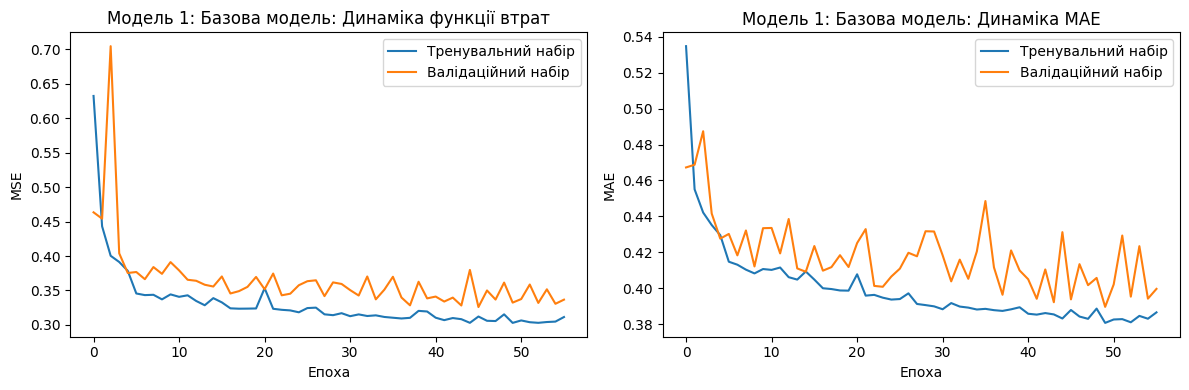

Навчання зупинилось на епосі 56 з 100


In [ ]:
# Модель 1: Базова модель (2 шари)
def create_base_model():
    model = Sequential([
        Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.01),
        loss='mse',
        metrics=['mae']
    )
    return model

# Навчання базової моделі з ранньою зупинкою
model1 = create_base_model()
history1 = model1.fit(
    X_train_scaled, y_train,
    epochs=100,  # Рання зупинка може спрацювати раніше
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],  # Додано ранню зупинку
    verbose=0
)

# Оцінка базової моделі
mse1, mae1 = evaluate_model(model1, X_train_scaled, y_train, X_test_scaled, y_test, "Модель 1: Базова модель")
plot_history(history1, "Модель 1: Базова модель")
results.append(("Базова модель", mae1, mse1))
print(f"Навчання зупинилось на епосі {len(history1.history['loss'])} з {100}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Модель 2: Більш глибока архітектура:
  Тренувальний набір - MSE: 0.2454, MAE: 0.3380
  Тестовий набір     - MSE: 0.2767, MAE: 0.3558


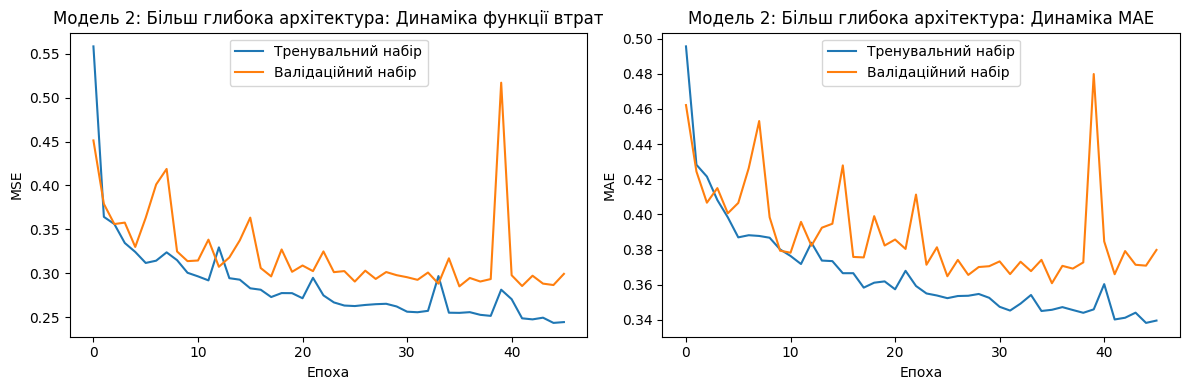

Навчання зупинилось на епосі 46 з 100


In [ ]:
# Модель 2: Більш глибока архітектура
def create_deeper_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.01),
        loss='mse',
        metrics=['mae']
    )
    return model

# Навчання більш глибокої моделі
model2 = create_deeper_model()
history2 = model2.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=0
)

# Оцінка більш глибокої моделі
mse2, mae2 = evaluate_model(model2, X_train_scaled, y_train, X_test_scaled, y_test, "Модель 2: Більш глибока архітектура")
plot_history(history2, "Модель 2: Більш глибока архітектура")
results.append(("Більш глибока архітектура", mae2, mse2))
print(f"Навчання зупинилось на епосі {len(history2.history['loss'])} з {100}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Модель 3: Збільшений розмір батчу:
  Тренувальний набір - MSE: 0.2527, MAE: 0.3437
  Тестовий набір     - MSE: 0.2791, MAE: 0.3615


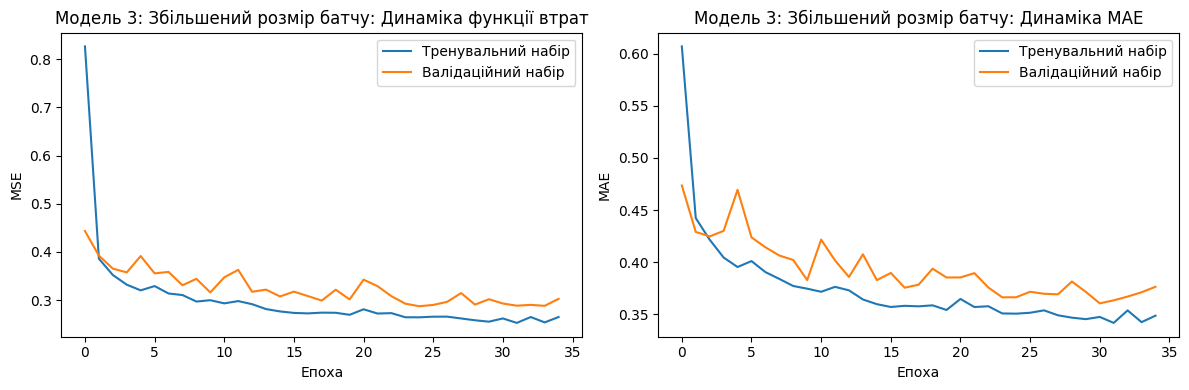

Навчання зупинилось на епосі 35 з 100


In [ ]:
# Модель 3: Збільшений розмір батчу
def create_larger_batch_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.01),
        loss='mse',
        metrics=['mae']
    )
    return model

# Навчання зі збільшеним розміром батчу
model3 = create_larger_batch_model()
history3 = model3.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=128,  # Збільшений розмір батчу
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=0
)

# Оцінка моделі зі збільшеним розміром батчу
mse3, mae3 = evaluate_model(model3, X_train_scaled, y_train, X_test_scaled, y_test, "Модель 3: Збільшений розмір батчу")
plot_history(history3, "Модель 3: Збільшений розмір батчу")
results.append(("Збільшений розмір батчу", mae3, mse3))
print(f"Навчання зупинилось на епосі {len(history3.history['loss'])} з {100}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Модель 4: З Dropout:
  Тренувальний набір - MSE: 0.3148, MAE: 0.3948
  Тестовий набір     - MSE: 0.3281, MAE: 0.4013


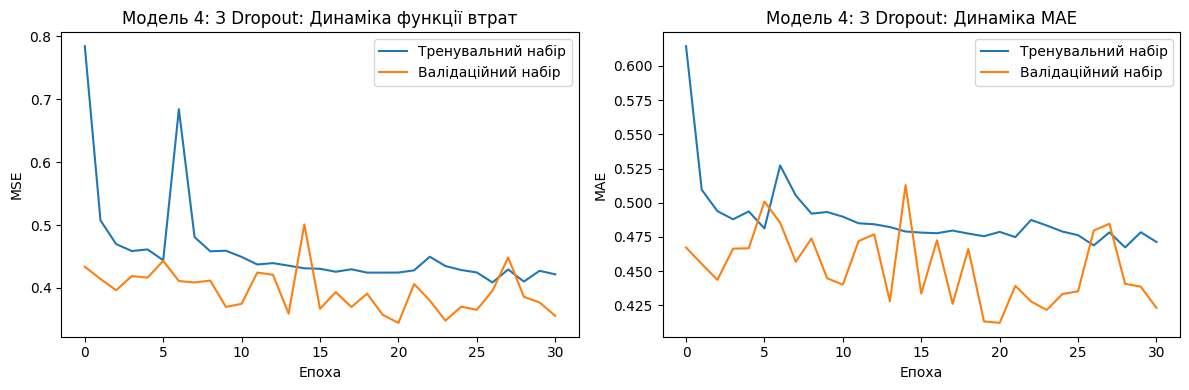

Навчання зупинилось на епосі 31 з 100


In [ ]:
# Модель 4: Додавання Dropout для боротьби з перенавчанням
def create_dropout_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.01),
        loss='mse',
        metrics=['mae']
    )
    return model

# Навчання моделі з Dropout
model4 = create_dropout_model()
history4 = model4.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=0
)

# Оцінка моделі з Dropout
mse4, mae4 = evaluate_model(model4, X_train_scaled, y_train, X_test_scaled, y_test, "Модель 4: З Dropout")
plot_history(history4, "Модель 4: З Dropout")
results.append(("Dropout", mae4, mse4))
print(f"Навчання зупинилось на епосі {len(history4.history['loss'])} з {100}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Модель 5: Активація tanh:
  Тренувальний набір - MSE: 0.3527, MAE: 0.4307
  Тестовий набір     - MSE: 0.3523, MAE: 0.4264


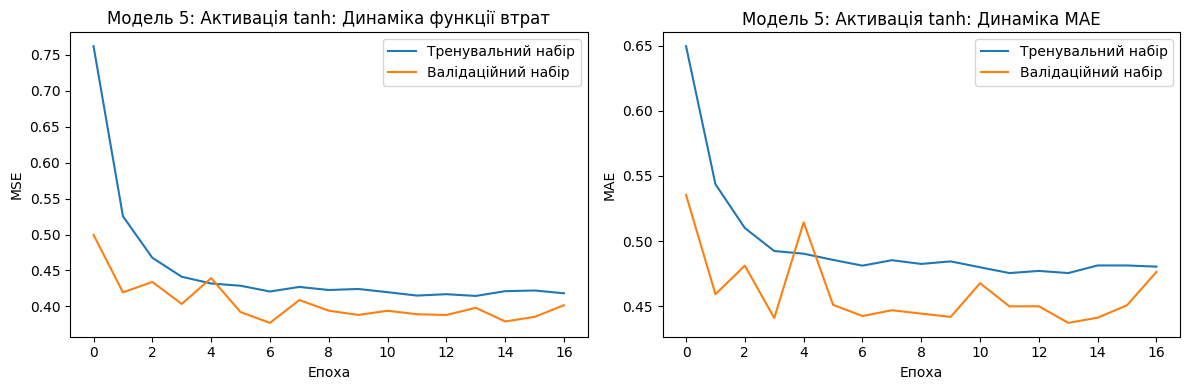

Навчання зупинилось на епосі 17 з 100


In [ ]:
# Модель 5: Зміна функції активації з ReLU на tanh
def create_tanh_model():
    model = Sequential([
        Dense(64, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='tanh'),
        Dropout(0.2),
        Dense(16, activation='tanh'),
        Dropout(0.2),
        Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.01),
        loss='mse',
        metrics=['mae']
    )
    return model

# Навчання моделі з tanh
model5 = create_tanh_model()
history5 = model5.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=0
)

# Оцінка моделі з tanh
mse5, mae5 = evaluate_model(model5, X_train_scaled, y_train, X_test_scaled, y_test, "Модель 5: Активація tanh")
plot_history(history5, "Модель 5: Активація tanh")
results.append(("Активація tanh", mae5, mse5))
print(f"Навчання зупинилось на епосі {len(history5.history['loss'])} з {100}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Модель 6: L2-регуляризація:
  Тренувальний набір - MSE: 0.3604, MAE: 0.4261
  Тестовий набір     - MSE: 0.3686, MAE: 0.4275


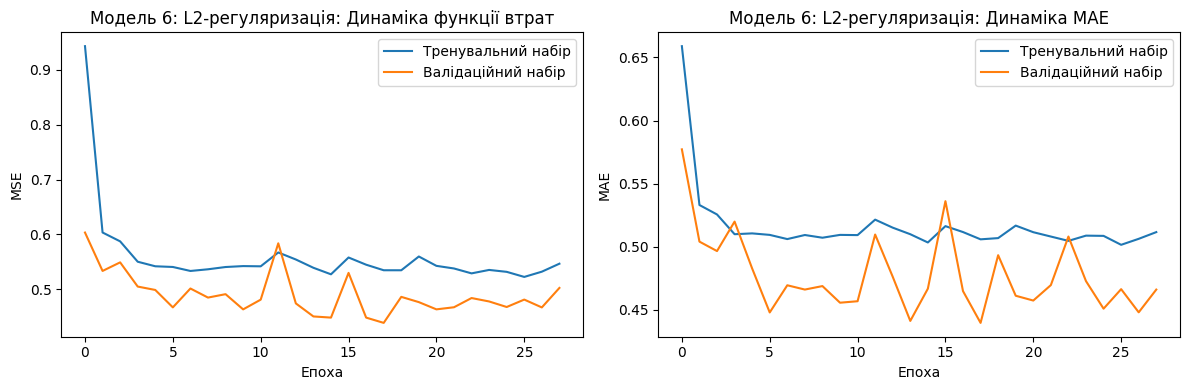

Навчання зупинилось на епосі 28 з 100


In [ ]:
# Модель 6: Додавання L2-регуляризації
def create_l2_model():
    model = Sequential([
        Dense(64, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.2),
        Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.2),
        Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.01),
        loss='mse',
        metrics=['mae']
    )
    return model

# Навчання моделі з L2-регуляризацією
model6 = create_l2_model()
history6 = model6.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=0
)

# Оцінка моделі з L2-регуляризацією
mse6, mae6 = evaluate_model(model6, X_train_scaled, y_train, X_test_scaled, y_test, "Модель 6: L2-регуляризація")
plot_history(history6, "Модель 6: L2-регуляризація")
results.append(("L2-регуляризація", mae6, mse6))
print(f"Навчання зупинилось на епосі {len(history6.history['loss'])} з {100}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Модель 7: SGD з моментом:
  Тренувальний набір - MSE: 0.2912, MAE: 0.3774
  Тестовий набір     - MSE: 0.3049, MAE: 0.3842


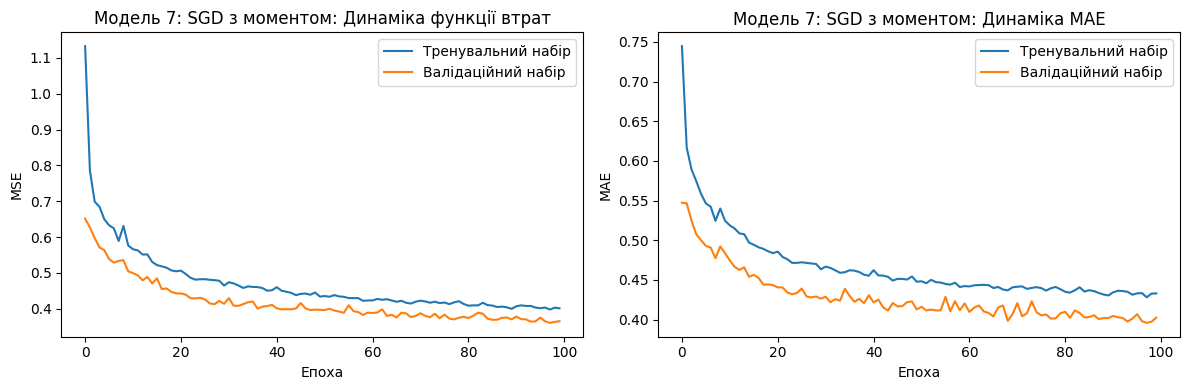

Навчання зупинилось на епосі 100 з 100


In [ ]:
# Модель 7: Оптимізатор SGD з моментом
def create_sgd_model():
    model = Sequential([
        Dense(64, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.2),
        Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.2),
        Dense(1)
    ])

    model.compile(
        optimizer=SGD(learning_rate=0.001, momentum=0.9),  # SGD з моментом
        loss='mse',
        metrics=['mae']
    )
    return model

# Навчання моделі з SGD
model7 = create_sgd_model()
history7 = model7.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=0
)

# Оцінка моделі з SGD
mse7, mae7 = evaluate_model(model7, X_train_scaled, y_train, X_test_scaled, y_test, "Модель 7: SGD з моментом")
plot_history(history7, "Модель 7: SGD з моментом")
results.append(("SGD з моментом", mae7, mse7))
print(f"Навчання зупинилось на епосі {len(history7.history['loss'])} з {100}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Модель 8: BatchNormalization:
  Тренувальний набір - MSE: 0.3687, MAE: 0.4250
  Тестовий набір     - MSE: 0.3707, MAE: 0.4262


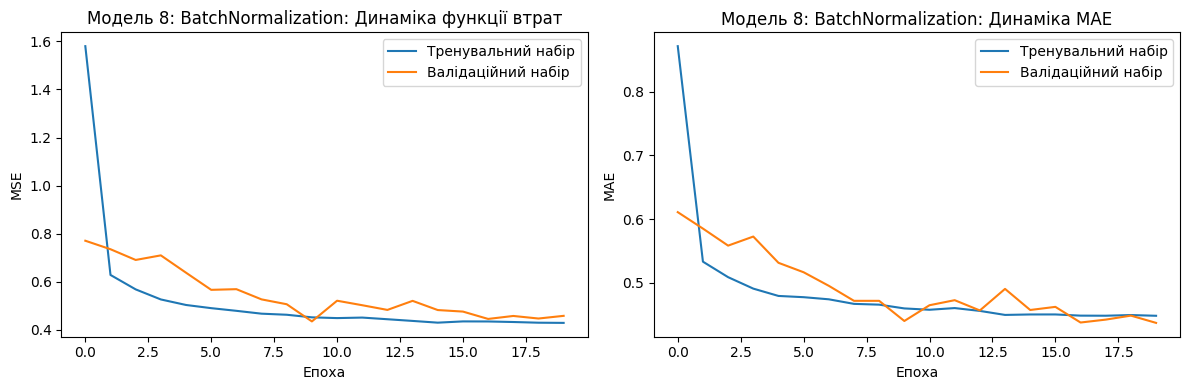

Навчання зупинилось на епосі 20 з 100


In [ ]:
# Модель 8: Додавання BatchNormalization
def create_batchnorm_model():
    model = Sequential([
        Dense(64, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train_scaled.shape[1],)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.01),
        loss='mse',
        metrics=['mae']
    )
    return model

# Навчання моделі з BatchNormalization та ранньою зупинкою
model8 = create_batchnorm_model()
history8 = model8.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping],  # Додано ранню зупинку
    verbose=0
)

# Оцінка моделі з BatchNormalization
mse8, mae8 = evaluate_model(model8, X_train_scaled, y_train, X_test_scaled, y_test, "Модель 8: BatchNormalization")
plot_history(history8, "Модель 8: BatchNormalization")
results.append(("BatchNormalization", mae8, mse8))
print(f"Навчання зупинилось на епосі {len(history8.history['loss'])} з {100}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Модель 9: L1 L2:
  Тренувальний набір - MSE: 0.3382, MAE: 0.4149
  Тестовий набір     - MSE: 0.3537, MAE: 0.4229


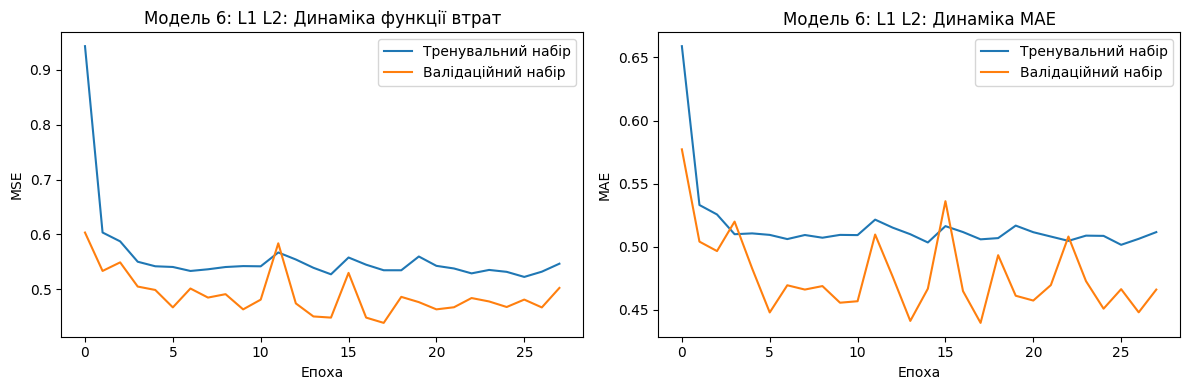

Навчання зупинилось на епосі 28 з 100


In [ ]:
# Модель 9: комбінація L1 і L2 регуляризації
def create_elasticnet_model():
    model = Sequential([
        Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001), input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.2),
        Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
        Dropout(0.2),
        Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
        Dropout(0.2),
        Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.01),
        loss='mse',
        metrics=['mae']
    )
    return model

# Навчання моделі з Elastic Net
model9 = create_elasticnet_model()
history9 = model9.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=0
)

# Оцінка моделі з Elastic Net
mse9, mae9 = evaluate_model(model9, X_train_scaled, y_train, X_test_scaled, y_test, "Модель 9: L1 L2")
plot_history(history6, "Модель 6: L1 L2")
results.append(("L1 L2", mae6, mse6))
print(f"Навчання зупинилось на епосі {len(history6.history['loss'])} з {100}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Модель 10: LR=0.001:
  Тренувальний набір - MSE: 0.2572, MAE: 0.3432
  Тестовий набір     - MSE: 0.2772, MAE: 0.3528


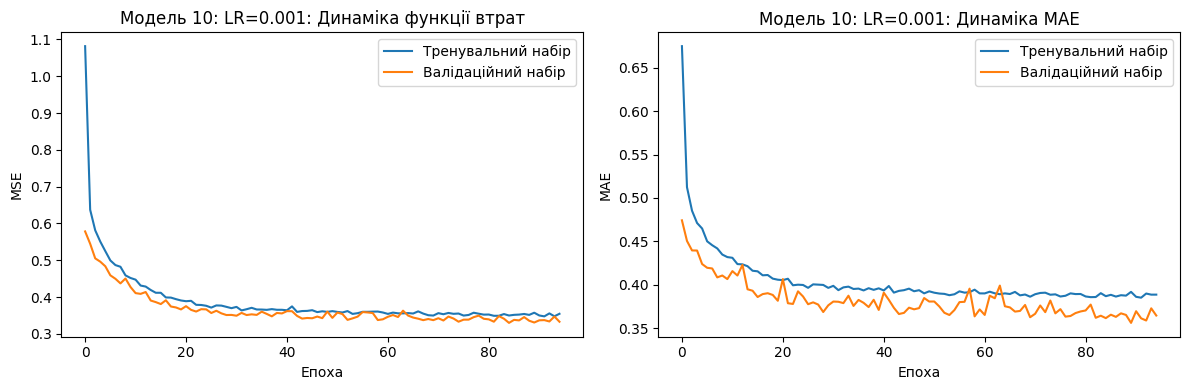

Навчання зупинилось на епосі 95 з 100


In [ ]:
# Модель 10: Менша швидкість навчання (0.001)
def create_low_lr_model():
    model = Sequential([
        Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001), input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.2),
        Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
        Dropout(0.2),
        Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    return model

model10 = create_low_lr_model()
history10 = model10.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=0
)
mse10, mae10 = evaluate_model(model10, X_train_scaled, y_train, X_test_scaled, y_test, "Модель 10: LR=0.001")
plot_history(history10, "Модель 10: LR=0.001")
results.append(("LR=0.001", mae10, mse10))
print(f"Навчання зупинилось на епосі {len(history10.history['loss'])} з {100}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Модель 11: Elastic Net, RMSprop, LR=0.0005:
  Тренувальний набір - MSE: 0.2649, MAE: 0.3522
  Тестовий набір     - MSE: 0.2783, MAE: 0.3617


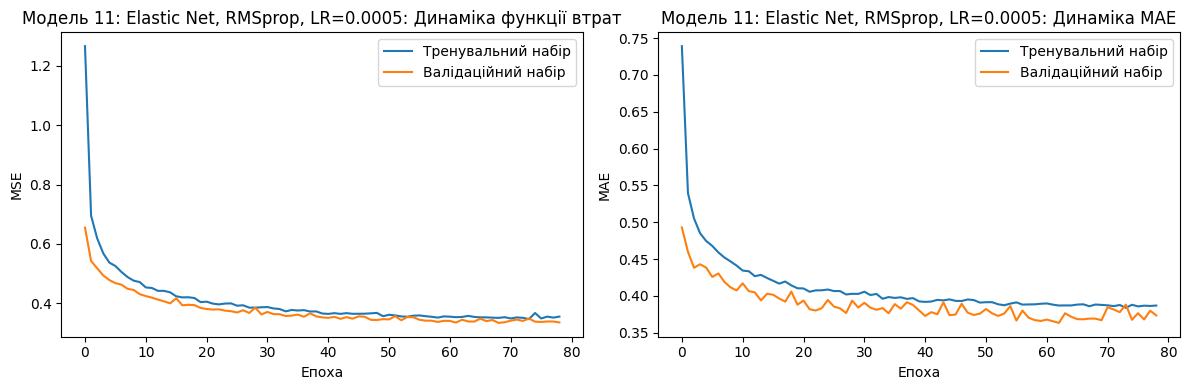

Навчання зупинилось на епосі 79 з 100


In [ ]:
# Модель 11: RMSprop, LR=0.0005
def create_rmsprop_model():
    model = Sequential([
        Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001), input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.2),
        Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
        Dropout(0.2),
        Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(
        optimizer=RMSprop(learning_rate=0.0005),
        loss='mse',
        metrics=['mae']
    )
    return model

model11 = create_rmsprop_model()
history11 = model11.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=0
)
mse11, mae11 = evaluate_model(model11, X_train_scaled, y_train, X_test_scaled, y_test, "Модель 11: Elastic Net, RMSprop, LR=0.0005")
plot_history(history11, "Модель 11: Elastic Net, RMSprop, LR=0.0005")
results.append(("Elastic Net, RMSprop, LR=0.0005", mae11, mse11))
print(f"Навчання зупинилось на епосі {len(history11.history['loss'])} з {100}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Модель 12: BatchNorm + Elastic Net, LR=0.0005:
  Тренувальний набір - MSE: 0.2645, MAE: 0.3533
  Тестовий набір     - MSE: 0.2844, MAE: 0.3658


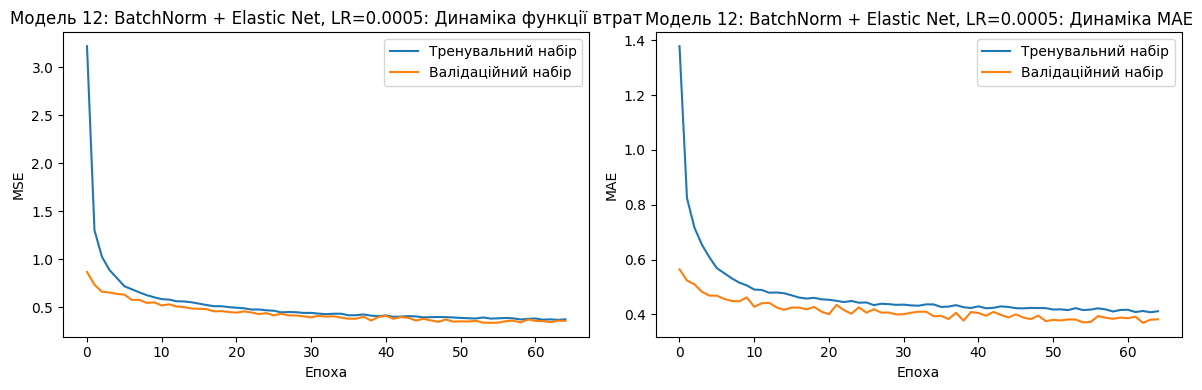

Навчання зупинилось на епосі 65 з 100


In [ ]:
# Модель 12: BatchNormalization + Elastic Net, LR=0.0005
def create_batchnorm_elasticnet_model():
    model = Sequential([
        Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001), input_shape=(X_train_scaled.shape[1],)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss='mse',
        metrics=['mae']
    )
    return model

model12 = create_batchnorm_elasticnet_model()
history12 = model12.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=0
)
mse12, mae12 = evaluate_model(model12, X_train_scaled, y_train, X_test_scaled, y_test, "Модель 12: BatchNorm + Elastic Net, LR=0.0005")
plot_history(history12, "Модель 12: BatchNorm + Elastic Net, LR=0.0005")
results.append(("BatchNorm + Elastic Net, LR=0.0005", mae12, mse12))
print(f"Навчання зупинилось на епосі {len(history12.history['loss'])} з {100}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 0.54466, saving model to best_model13.h5



Epoch 2: val_loss improved from 0.54466 to 0.49474, saving model to best_model13.h5



Epoch 3: val_loss improved from 0.49474 to 0.48941, saving model to best_model13.h5



Epoch 4: val_loss improved from 0.48941 to 0.44820, saving model to best_model13.h5



Epoch 5: val_loss did not improve from 0.44820

Epoch 6: val_loss did not improve from 0.44820

Epoch 7: val_loss improved from 0.44820 to 0.43787, saving model to best_model13.h5



Epoch 8: val_loss improved from 0.43787 to 0.43597, saving model to best_model13.h5



Epoch 9: val_loss did not improve from 0.43597

Epoch 10: val_loss improved from 0.43597 to 0.43031, saving model to best_model13.h5



Epoch 11: val_loss did not improve from 0.43031

Epoch 12: val_loss did not improve from 0.43031

Epoch 13: val_loss did not improve from 0.43031

Epoch 14: val_loss did not improve from 0.43031

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.

Epoch 15: val_loss did not improve from 0.43031

Epoch 16: val_loss improved from 0.43031 to 0.40876, saving model to best_model13.h5



Epoch 17: val_loss improved from 0.40876 to 0.40129, saving model to best_model13.h5



Epoch 18: val_loss did not improve from 0.40129

Epoch 19: val_loss did not improve from 0.40129

Epoch 20: val_loss did not improve from 0.40129

Epoch 21: val_loss improved from 0.40129 to 0.39358, saving model to best_model13.h5



Epoch 22: val_loss did not improve from 0.39358

Epoch 23: val_loss did not improve from 0.39358

Epoch 24: val_loss did not improve from 0.39358

Epoch 25: val_loss improved from 0.39358 to 0.39306, saving model to best_model13.h5



Epoch 26: val_loss did not improve from 0.39306

Epoch 27: val_loss did not improve from 0.39306

Epoch 28: val_loss did not improve from 0.39306

Epoch 29: val_loss did not improve from 0.39306

Epoch 30: val_loss improved from 0.39306 to 0.37739, saving model to best_model13.h5



Epoch 31: val_loss did not improve from 0.37739

Epoch 32: val_loss did not improve from 0.37739

Epoch 33: val_loss did not improve from 0.37739

Epoch 34: val_loss did not improve from 0.37739

Epoch 35: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.

Epoch 35: val_loss did not improve from 0.37739

Epoch 36: val_loss improved from 0.37739 to 0.36350, saving model to best_model13.h5



Epoch 37: val_loss improved from 0.36350 to 0.35976, saving model to best_model13.h5



Epoch 38: val_loss did not improve from 0.35976

Epoch 39: val_loss did not improve from 0.35976

Epoch 40: val_loss did not improve from 0.35976

Epoch 41: val_loss did not improve from 0.35976

Epoch 42: ReduceLROnPlateau reducing learning rate to 0.0012499999720603228.

Epoch 42: val_loss did not improve from 0.35976

Epoch 43: val_loss improved from 0.35976 to 0.35415, saving model to best_model13.h5



Epoch 44: val_loss improved from 0.35415 to 0.34658, saving model to best_model13.h5



Epoch 45: val_loss did not improve from 0.34658

Epoch 46: val_loss did not improve from 0.34658

Epoch 47: val_loss did not improve from 0.34658

Epoch 48: val_loss did not improve from 0.34658

Epoch 49: ReduceLROnPlateau reducing learning rate to 0.0006249999860301614.

Epoch 49: val_loss did not improve from 0.34658

Epoch 50: val_loss improved from 0.34658 to 0.34606, saving model to best_model13.h5



Epoch 51: val_loss improved from 0.34606 to 0.34540, saving model to best_model13.h5



Epoch 52: val_loss did not improve from 0.34540

Epoch 53: val_loss improved from 0.34540 to 0.34402, saving model to best_model13.h5



Epoch 54: val_loss improved from 0.34402 to 0.34322, saving model to best_model13.h5



Epoch 55: val_loss improved from 0.34322 to 0.34213, saving model to best_model13.h5



Epoch 56: val_loss did not improve from 0.34213

Epoch 57: val_loss improved from 0.34213 to 0.34197, saving model to best_model13.h5



Epoch 58: val_loss improved from 0.34197 to 0.34034, saving model to best_model13.h5



Epoch 59: val_loss did not improve from 0.34034

Epoch 60: val_loss did not improve from 0.34034

Epoch 61: val_loss did not improve from 0.34034

Epoch 62: val_loss did not improve from 0.34034

Epoch 63: ReduceLROnPlateau reducing learning rate to 0.0003124999930150807.

Epoch 63: val_loss did not improve from 0.34034

Epoch 64: val_loss improved from 0.34034 to 0.33892, saving model to best_model13.h5



Epoch 65: val_loss did not improve from 0.33892

Epoch 66: val_loss did not improve from 0.33892

Epoch 67: val_loss did not improve from 0.33892

Epoch 68: val_loss did not improve from 0.33892

Epoch 69: ReduceLROnPlateau reducing learning rate to 0.00015624999650754035.

Epoch 69: val_loss did not improve from 0.33892

Epoch 70: val_loss improved from 0.33892 to 0.33798, saving model to best_model13.h5



Epoch 71: val_loss did not improve from 0.33798

Epoch 72: val_loss did not improve from 0.33798

Epoch 73: val_loss did not improve from 0.33798

Epoch 74: val_loss did not improve from 0.33798

Epoch 75: ReduceLROnPlateau reducing learning rate to 7.812499825377017e-05.

Epoch 75: val_loss did not improve from 0.33798

Epoch 76: val_loss did not improve from 0.33798

Epoch 77: val_loss did not improve from 0.33798

Epoch 78: val_loss did not improve from 0.33798

Epoch 79: val_loss did not improve from 0.33798

Epoch 80: val_loss improved from 0.33798 to 0.33786, saving model to best_model13.h5



Epoch 81: val_loss improved from 0.33786 to 0.33755, saving model to best_model13.h5



Epoch 82: val_loss did not improve from 0.33755

Epoch 83: val_loss did not improve from 0.33755

Epoch 84: val_loss improved from 0.33755 to 0.33744, saving model to best_model13.h5



Epoch 85: val_loss improved from 0.33744 to 0.33717, saving model to best_model13.h5



Epoch 86: val_loss did not improve from 0.33717

Epoch 87: val_loss did not improve from 0.33717

Epoch 88: val_loss did not improve from 0.33717

Epoch 89: val_loss did not improve from 0.33717

Epoch 90: ReduceLROnPlateau reducing learning rate to 3.9062499126885086e-05.

Epoch 90: val_loss improved from 0.33717 to 0.33708, saving model to best_model13.h5



Epoch 91: val_loss improved from 0.33708 to 0.33707, saving model to best_model13.h5



Epoch 92: val_loss did not improve from 0.33707

Epoch 93: val_loss did not improve from 0.33707

Epoch 94: val_loss did not improve from 0.33707

Epoch 95: ReduceLROnPlateau reducing learning rate to 1.9531249563442543e-05.

Epoch 95: val_loss did not improve from 0.33707

Epoch 96: val_loss did not improve from 0.33707

Epoch 97: val_loss did not improve from 0.33707

Epoch 98: val_loss did not improve from 0.33707

Epoch 99: val_loss improved from 0.33707 to 0.33704, saving model to best_model13.h5



Epoch 100: val_loss did not improve from 0.33704
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Модель 13: Dynamic LR + Checkpoint:
  Тренувальний набір - MSE: 0.2659, MAE: 0.3628
  Тестовий набір     - MSE: 0.2904, MAE: 0.3754


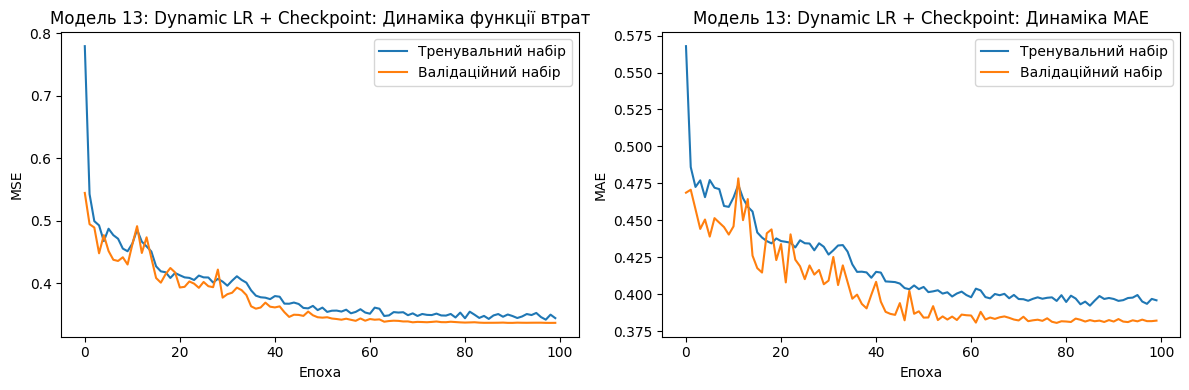

Навчання зупинилось на епосі 100 з 100


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# Callbacks для зменшення learning rate та збереження чекпоінтів
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,        # у скільки разів зменшувати learning rate
    patience=5,        # скільки епох чекати без покращення
    min_lr=1e-6,       # мінімальний learning rate
    verbose=1
)

checkpoint = ModelCheckpoint(
    'best_model13.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Модель 13: З динамічним learning rate
def create_dynamic_lr_model():
    model = Sequential([
        Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001), input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.1),
        Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
        Dropout(0.1),
        Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
        Dropout(0.1),
        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
        Dropout(0.1),
        Dense(1)
    ])
    model.compile(
        optimizer=Adam(learning_rate=0.01),
        loss='mse',
        metrics=['mae']
    )
    return model

model13 = create_dynamic_lr_model()
history13 = model13.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr, checkpoint],
    verbose=0
)

# Оцінка моделі 13
mse13, mae13 = evaluate_model(model13, X_train_scaled, y_train, X_test_scaled, y_test, "Модель 13: Dynamic LR + Checkpoint")
plot_history(history13, "Модель 13: Dynamic LR + Checkpoint")
results.append(("Dynamic LR + Checkpoint", mae13, mse13))
print(f"Навчання зупинилось на епосі {len(history13.history['loss'])} з {100}")

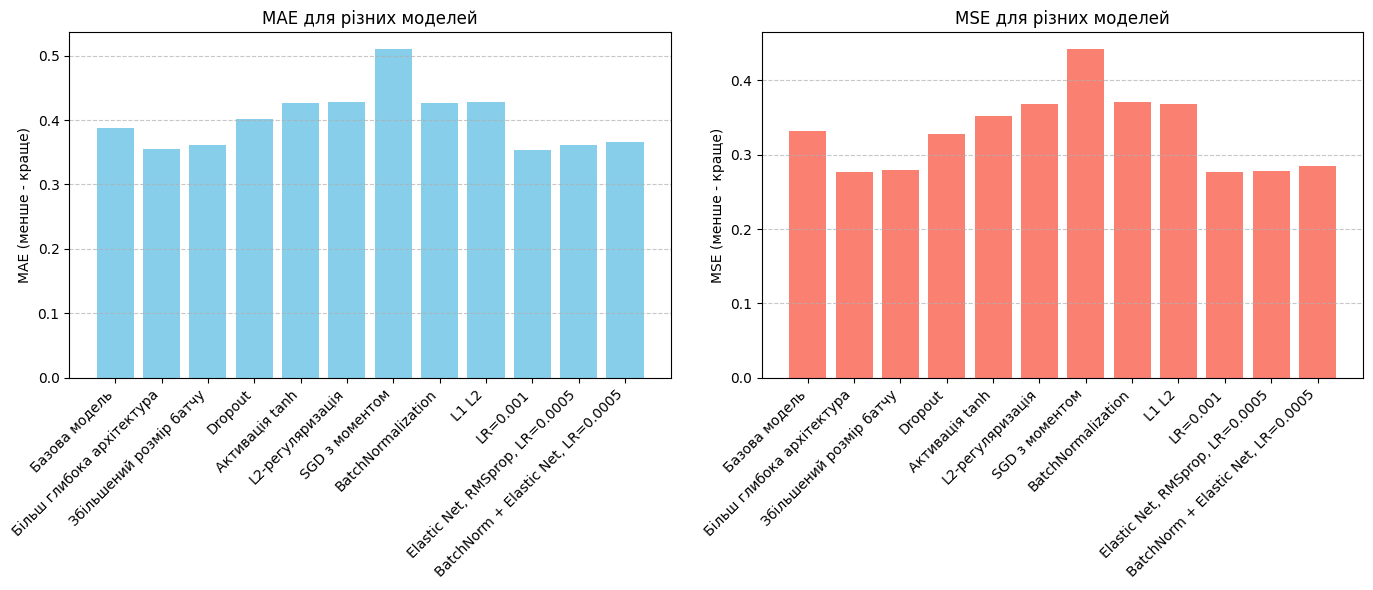

Зведена таблиця результатів:


,Модель,MAE,MSE
9,LR=0.001,0.352840,0.277217
1,Більш глибока архітектура,0.355791,0.276724
2,Збільшений розмір батчу,0.361471,0.279073
10,"Elastic Net, RMSprop, LR=0.0005",0.361662,0.278328
12,"BatchNorm + Elastic Net, LR=0.0005",0.365804,0.284356
11,BatchNormalization,0.365859,0.288473
13,SGD з моментом,0.384215,0.304886
0,Базова модель,0.387644,0.332033
3,Dropout,0.401327,0.328104
7,BatchNormalization,0.426181,0.370690


In [ ]:
# Візуалізація результатів усіх моделей
models = [model_name for model_name, _, _ in results]
maes = [mae for _, mae, _ in results]
mses = [mse for _, _, mse in results]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(models, maes, color='skyblue')
plt.title('MAE для різних моделей')
plt.xticks(rotation=45, ha='right')
plt.ylabel('MAE (менше - краще)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.bar(models, mses, color='salmon')
plt.title('MSE для різних моделей')
plt.xticks(rotation=45, ha='right')
plt.ylabel('MSE (менше - краще)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Виведення результатів у таблиці
results_df = pd.DataFrame(results, columns=['Модель', 'MAE', 'MSE'])
print("Зведена таблиця результатів:")
display(results_df.sort_values('MAE'))

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


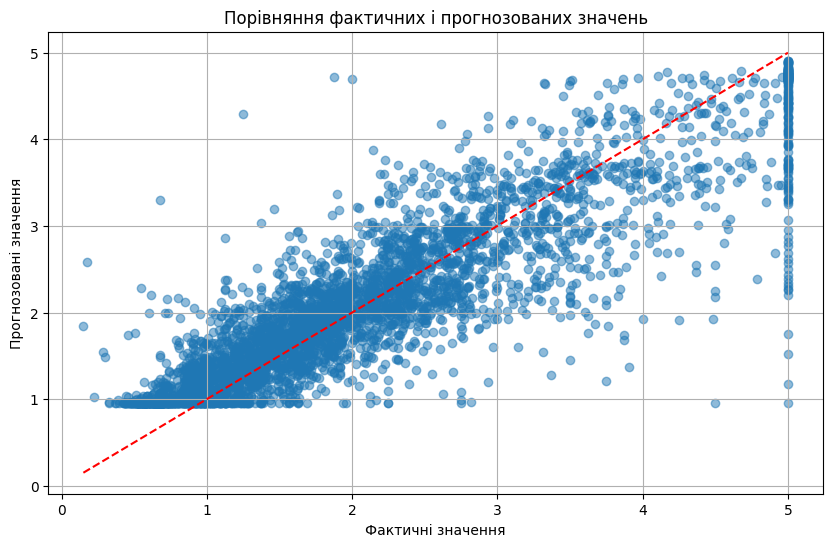

In [ ]:
# Прогнозування моделі
y_pred = model13.predict(X_test_scaled)

# Порівняння фактичних і прогнозованих значень
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.title(f'Порівняння фактичних і прогнозованих значень')
plt.grid(True)
plt.show()

In [ ]:
# Збереження найкращої моделі (наприклад, model9)
import os

# Створюємо директорію для збереження, якщо потрібно
os.makedirs("saved_models", exist_ok=True)

# Зберігаємо всю модель (архітектура + ваги + оптимізатор)
model9.save("saved_models/model9_elasticnet_full.h5")

print("Модель збережено у saved_models/")

Модель збережено у saved_models/


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# Завантаження найкращої збереженої моделі
best_checkpoint_model = load_model('best_model13.h5', custom_objects={'mse': MeanSquaredError()})

# Оцінка збереженої моделі
mse_cp, mae_cp = evaluate_model(best_checkpoint_model, X_train_scaled, y_train, X_test_scaled, y_test, "Модель 13 (Checkpoint)")

516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Модель 13 (Checkpoint):
  Тренувальний набір - MSE: 0.2659, MAE: 0.3628
  Тестовий набір     - MSE: 0.2904, MAE: 0.3754
